In [8]:
#import pandas
# We will simplify columns by providing col_names to pandas read_csv() function.
import pandas as pd
# col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
data = pd.read_csv("diabetes.csv")

In [9]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
# Feature Selection
# split dataset in features(independent variable) and target variable(dependent variable)
# feature_cols variable is a list of column names that represent the features in the dataset.
feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure','DiabetesPedigreeFunction']
X = data[feature_cols] # Features
y = data.Outcome # Target variable

In [21]:
# SPLIT THE DATA
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split
# random state selects records randomly
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [22]:
# MODEL DEVELOPMENT AND PREDICTION
# import the class (LogisticRegression) from sklearn.linear_model
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
y_pred

C:\Users\Jim\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

In [23]:
# A confusion matrix is a table that is used to evaluate the performance of a classification model. 
# You can also visualize the performance of an algorithm.
# The fundamental part of a confusion matrix is the number of correct and incorrect predictions summed up class-wise.

In [24]:
# MODEL EVALUATION USING CONFUSION MATRIX
# import the metrics class from sklearn library
from sklearn import metrics

# calculate the confusion matrix by calling the confusion_matrix() function from the metrics class, 
# passing in the true labels y_test and the predicted labels y_pred as arguments.
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,  10],
       [ 24,  43]], dtype=int64)

In [25]:
# Cofusion matrix is in the form of an array  object
# Dimension of the matrix is 2 by 2 because the model us binary classification (0 and 1)
# Diagonal values represent accurate predictions
# non-diagonal elements are inacurate predictions
# 115 and 43 ae actual predictions
# 24 and 10 are incorrec predictions

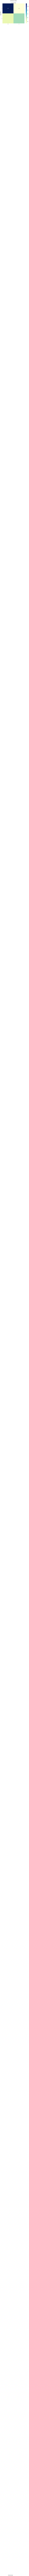

In [27]:
# VISUALIZING CONFUSION MATRIX USING HEATMAP
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # deffine a list of classnames
fig, ax = plt.subplots() # create subplot object using matplotlib
tick_marks = np.arange(len(class_names)) # create tickmarks for the X and y axes using numpy's arrange function
# set the tick labels to the classnames
plt.xticks(tick_marks, class_names) 
plt.yticks(tick_marks, class_names)
# create heatmap
# the heatmap is annotated with values in the matrix & coloured using the YlGnBu colormap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top") # set the a-axis label to be on top of the plot
plt.tight_layout() # tighten the plot
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.text(0.5,257.44,'Predicted label');

In [15]:
# CONFUSION MATRIX EVALUATION METRICS
# Evaluate the model using classification_report for accuracy, precision and recall.
from sklearn.metrics import classification_report #imports the classification_report function from the sklearn.metrics module.
target_names = ['without diabetes', 'with diabetes'] #define a list of target names for the classification report
# print the classification report
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.83      0.92      0.87       125
   with diabetes       0.81      0.64      0.72        67

        accuracy                           0.82       192
       macro avg       0.82      0.78      0.79       192
    weighted avg       0.82      0.82      0.82       192



In [ ]:
# Precision: how precise/accurate your model is
# Recall: 

In [17]:
# ROC Curve
# Receiver Operating Characteristic (ROC) curve is a plot of the true positive rate against the false positive rate. 
# It shows the tradeoff between sensitivity and specificity

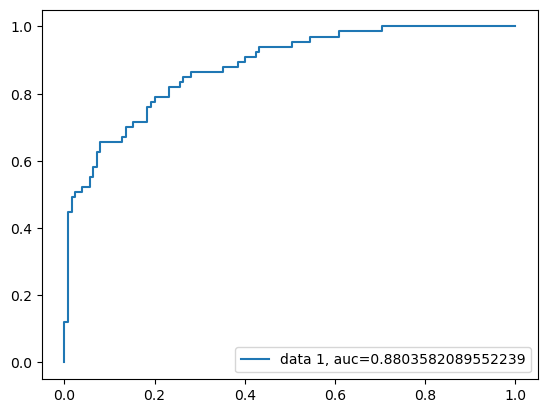

In [18]:
#  the predict_proba method of the logistic regression model (logreg) 
#  is used to predict the probabilities of the positive class for the test set (X_test).
y_pred_proba = logreg.predict_proba(X_test)[::,1] #The probabilities for the positive class are extracted using [::,1].

# the roc_curve function from the metrics module is used to calculate the 
# false positive rate (fpr) and true positive rate (tpr) for different probability thresholds.
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba) # The y_test parameter is the true labels for the test set.
# the roc_auc_score function from the metrics module is used to calculate the area under the ROC curve (auc) 
# for the predicted probabilities and true labels.
auc = metrics.roc_auc_score(y_test, y_pred_proba)
# the plot function from the pyplot module is used to plot the ROC curve using fpr and tpr.
plt.plot(fpr,tpr,label="data 1, auc="+str(auc)) #label parameter is used to add a label to the plot with the calculated auc value
plt.legend(loc=4) #legend function is used to display the label in the plot.
plt.show() #show function is used to display the plot.

In [ ]:
# AUC score for the case is 0.88. 
# AUC score 1 represents a perfect classifier, and 0.5 represents a worthless classifier.